In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [87]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [88]:
def detectar_outliers_iqr(df, columna, factor=1.5):
    """
    Detecta outliers usando el método IQR.
    
    Parámetros:
    -----------
    df : DataFrame
        DataFrame de pandas
    columna : str
        Nombre de la columna numérica
    factor : float, default=1.5
        Factor multiplicador del IQR (1.5 estándar, 3.0 más conservador)
    
    Retorna:
    --------
    dict : Diccionario con información de outliers
    """
    # Calcular Q1, Q3 e IQR
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    
    # Calcular límites
    limite_inferior = Q1 - factor * IQR
    limite_superior = Q3 + factor * IQR
    
    # Identificar outliers
    outliers = df[(df[columna] < limite_inferior) | (df[columna] > limite_superior)]
    
    return {
        'Q1': Q1,
        'Q3': Q3,
        'IQR': IQR,
        'limite_inferior': limite_inferior,
        'limite_superior': limite_superior,
        'n_outliers': len(outliers),
        'outliers': outliers,
        'indices_outliers': outliers.index.tolist()
    }

print("✅ Función detectar_outliers_iqr creada")

✅ Función detectar_outliers_iqr creada


In [89]:
df = pd.read_csv("housing-dataset.csv", index_col="Id")

In [90]:
df.sample(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
168,60,RL,86.0,10562,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,2Story,8,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,Stone,300.0,Gd,TA,PConc,Ex,TA,No,GLQ,1288,Unf,0,294,1582,GasA,Ex,Y,SBrkr,1610,551,0,2161,1,0,1,1,3,1,Ex,8,Typ,1,Gd,Attchd,2007.0,Fin,3,789,TA,TA,Y,178,120,0,0,0,0,NaN,NaN,NaN,0,11,2007,New,Partial,325624
235,60,RL,NaN,7851,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,625,Unf,0,235,860,GasA,Ex,Y,SBrkr,860,1100,0,1960,1,0,2,1,4,1,Gd,8,Typ,2,TA,BuiltIn,2002.0,Fin,2,440,TA,TA,Y,288,48,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,216500
328,20,RL,80.0,11600,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,175.0,TA,TA,CBlock,TA,TA,No,Rec,565,Unf,0,818,1383,GasA,TA,Y,SBrkr,1383,0,0,1383,0,0,1,1,3,1,TA,7,Typ,0,NaN,Attchd,1960.0,RFn,1,292,TA,TA,Y,0,45,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Normal,145250
1280,50,C (all),60.0,7500,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1.5Fin,4,4,1920,1950,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,Gd,CBlock,TA,TA,No,Unf,0,Unf,0,698,698,GasA,TA,Y,FuseA,698,430,0,1128,0,0,1,0,2,1,TA,6,Typ,0,NaN,Detchd,1980.0,RFn,2,528,TA,TA,Y,30,0,164,0,0,0,NaN,NaN,NaN,0,4,2010,COD,Abnorml,68400
540,20,RL,NaN,11423,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,8,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,479.0,Gd,TA,PConc,Gd,TA,Av,GLQ,1358,Unf,0,223,1581,GasA,Ex,Y,SBrkr,1601,0,0,1601,1,0,2,0,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,670,TA,TA,Y,180,0,0,0,0,0,NaN,MnPrv,Shed,2000,5,2010,WD,Normal,272000
333,20,RL,85.0,10655,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,8,5,2003,2004,Gable,CompShg,VinylSd,VinylSd,BrkFace,296.0,Gd,TA,PConc,Gd,TA,No,GLQ,1124,NaN,479,1603,3206,GasA,Ex,Y,SBrkr,1629,0,0,1629,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2003.0,RFn,3,880,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,10,2009,WD,Normal,284000
412,190,RL,100.0,34650,Pave,NaN,Reg,Bnk,AllPub,Inside,Gtl,Gilbert,Norm,Norm,2fmCon,1Story,5,5,1955,1955,Hip,CompShg,Wd Sdng,Wd Sdng,NaN,0.0,TA,TA,CBlock,TA,TA,Mn,Rec,1056,Unf,0,0,1056,GasA,TA,N,SBrkr,1056,0,0,1056,1,0,1,0,3,1,TA,5,Typ,0,NaN,Attchd,1955.0,Fin,2,572,TA,TA,Y,264,0,0,0,0,0,NaN,NaN,NaN,0,1,2006,WD,Normal,145000
644,60,RL,80.0,10793,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,RRAn,Norm,1Fam,2Story,5,5,1969,1969,Mansard,CompShg,WdShing,HdBoard,BrkFace,263.0,TA,TA,CBlock,TA,TA,No,Rec,493,BLQ,287,0,780,GasA,Ex,Y,SBrkr,780,840,0,1620,0,0,2,1,4,1,TA,7,Min1,0,NaN,Attchd,1969.0,Fin,2,462,TA,TA,Y,208,0,0,0,0,0,NaN,GdWo,NaN,0,4,2007,WD,Normal,152000
134,20,RL,NaN,6853,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,1Story,8,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,136.0,Gd,TA,PConc,Ex,TA,No,GLQ,1005,Unf,0,262,1267,GasA,Ex,Y,SBrkr,1296,0,0,1296,1,0,2,0,2,1,Gd,6,Typ,0,NaN,Attchd,2001.0,Fin,2,471,TA,TA,Y,192,25,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal,220000


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt    

In [92]:
aux = df.isnull().sum()
 
aux[ aux > 0 ].sort_values(ascending=False)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
dtype: int64

In [93]:
df.shape

(1460, 80)

In [94]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

## Variable MSSubClass

In [95]:
sorted(df["MSSubClass"].unique())

[np.int64(20),
 np.int64(30),
 np.int64(40),
 np.int64(45),
 np.int64(50),
 np.int64(60),
 np.int64(70),
 np.int64(75),
 np.int64(80),
 np.int64(85),
 np.int64(90),
 np.int64(120),
 np.int64(160),
 np.int64(180),
 np.int64(190)]

In [96]:
conv = {
    20: "1-STORY 1946 & NEWER ALL STYLES",
    30: "1-STORY 1945 & OLDER",
    40: "1-STORY W/FINISHED ATTIC ALL AGES",
    45: "1-1/2 STORY - UNFINISHED ALL AGES",
    50: "1-1/2 STORY FINISHED ALL AGES",
    60: "2-STORY 1946 & NEWER",
    70: "2-STORY 1945 & OLDER",
    75: "2-1/2 STORY ALL AGES",
    80: "SPLIT OR MULTI-LEVEL",
    85: "SPLIT FOYER",
    90: "DUPLEX - ALL STYLES AND AGES",
    120: "1-STORY PUD (Planned Unit Development) - 1946 & NEWER",
    150: "1-1/2 STORY PUD - ALL AGES",
    160: "2-STORY PUD - 1946 & NEWER",
    180: "PUD - MULTILEVEL - INCL SPLIT LEV/FOYER",
    190: "2 FAMILY CONVERSION - ALL STYLES AND AGES",
}

df["MSSubClass"] = df["MSSubClass"].replace(conv)


In [97]:
df.sample(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
189,DUPLEX - ALL STYLES AND AGES,RL,64.0,7018,Pave,NaN,Reg,Bnk,AllPub,Inside,Gtl,SawyerW,Feedr,Norm,Duplex,SFoyer,5,5,1979,1979,Gable,CompShg,Plywood,Plywood,Stone,275.0,TA,TA,CBlock,Gd,TA,Av,GLQ,1086,Unf,0,0,1086,GasA,TA,Y,SBrkr,1224,0,0,1224,2,0,0,2,2,2,TA,6,Typ,2,TA,Detchd,1979.0,Unf,2,528,TA,TA,Y,120,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Alloca,153337
504,1-STORY 1946 & NEWER ALL STYLES,RL,100.0,15602,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,1Story,7,8,1959,1997,Gable,CompShg,BrkFace,Wd Sdng,NaN,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1247,Unf,0,254,1501,GasA,TA,Y,SBrkr,1801,0,0,1801,1,0,2,0,1,1,TA,6,Typ,2,TA,Attchd,1959.0,Fin,2,484,TA,TA,Y,0,54,0,0,161,0,NaN,GdWo,NaN,0,3,2010,WD,Normal,289000
1091,DUPLEX - ALL STYLES AND AGES,RL,60.0,8544,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,Duplex,1Story,3,4,1950,1950,Gable,CompShg,BrkFace,BrkFace,NaN,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,Wall,Fa,N,FuseA,1040,0,0,1040,0,0,2,0,2,2,TA,6,Typ,0,NaN,Detchd,1987.0,Unf,2,400,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal,92900
998,1-STORY 1946 & NEWER ALL STYLES,RL,NaN,11717,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,PosA,Norm,1Fam,1Story,6,6,1970,1970,Hip,CompShg,HdBoard,HdBoard,BrkFace,571.0,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,0,1442,1442,GasA,TA,Y,SBrkr,1442,0,0,1442,0,0,2,0,2,1,TA,6,Typ,1,TA,Attchd,1970.0,RFn,2,615,TA,TA,Y,371,0,0,0,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal,185000
315,2-STORY 1945 & OLDER,RM,60.0,9600,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,2Story,7,7,1925,1990,Gable,CompShg,Wd Sdng,Wd Sdng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,LwQ,16,Unf,0,712,728,GasA,Ex,Y,SBrkr,832,809,0,1641,0,1,1,1,3,1,Ex,6,Typ,1,Gd,Detchd,1925.0,Unf,2,546,Fa,TA,Y,0,0,234,0,0,0,NaN,NaN,NaN,0,8,2006,WD,Normal,178000
619,1-STORY 1946 & NEWER ALL STYLES,RL,90.0,11694,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,9,5,2007,2007,Hip,CompShg,CemntBd,CmentBd,BrkFace,452.0,Ex,TA,PConc,Ex,TA,Av,GLQ,48,Unf,0,1774,1822,GasA,Ex,Y,SBrkr,1828,0,0,1828,0,0,2,0,3,1,Gd,9,Typ,1,Gd,Attchd,2007.0,Unf,3,774,TA,TA,Y,0,108,0,0,260,0,NaN,NaN,NaN,0,7,2007,New,Partial,314813
721,1-STORY PUD (Planned Unit Development) - 1946 ...,RL,NaN,6563,Pave,NaN,IR1,Low,AllPub,CulDSac,Mod,StoneBr,Norm,Norm,1Fam,1Story,8,5,1985,1985,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,Gd,TA,PConc,Gd,TA,Gd,GLQ,1148,Unf,0,594,1742,GasA,TA,Y,SBrkr,1742,0,0,1742,1,0,2,0,2,1,Gd,5,Typ,1,TA,Attchd,1985.0,RFn,2,564,TA,TA,Y,114,28,234,0,0,0,NaN,NaN,NaN,0,12,2006,WD,Normal,275000
837,1-STORY 1945 & OLDER,RM,90.0,8100,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1948,1973,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,BrkTil,TA,TA,No,Rec,338,Unf,0,1221,1559,GasA,Gd,Y,SBrkr,1559,0,0,1559,1,0,1,0,2,1,TA,5,Min2,0,NaN,Detchd,1948.0,Unf,2,812,TA,TA,Y,0,116,230,0,0,0,NaN,GdWo,NaN,0,6,2007,COD,Normal,153500
727,1-STORY 1946 & NEWER ALL STYLES,RL,NaN,21695,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,1Story,6,9,1988,2007,Hip,CompShg,Wd Sdng,Plywood,BrkFace,260.0,Gd,Gd,CBlock,Gd,TA,No,GLQ,808,Unf,0,72,880,GasA,Ex,Y,SBrkr,1680,0,0,16

In [98]:
df["MSSubClass"].unique()

array(['2-STORY 1946 & NEWER', '1-STORY 1946 & NEWER ALL STYLES',
       '2-STORY 1945 & OLDER', '1-1/2 STORY FINISHED ALL AGES',
       '2 FAMILY CONVERSION - ALL STYLES AND AGES',
       '1-1/2 STORY - UNFINISHED ALL AGES',
       'DUPLEX - ALL STYLES AND AGES',
       '1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
       '1-STORY 1945 & OLDER', 'SPLIT FOYER', 'SPLIT OR MULTI-LEVEL',
       '2-STORY PUD - 1946 & NEWER', '2-1/2 STORY ALL AGES',
       'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
       '1-STORY W/FINISHED ATTIC ALL AGES'], dtype=object)

In [99]:
df["MSSubClass"].value_counts()

MSSubClass
1-STORY 1946 & NEWER ALL STYLES                          536
2-STORY 1946 & NEWER                                     299
1-1/2 STORY FINISHED ALL AGES                            144
1-STORY PUD (Planned Unit Development) - 1946 & NEWER     87
1-STORY 1945 & OLDER                                      69
2-STORY PUD - 1946 & NEWER                                63
2-STORY 1945 & OLDER                                      60
SPLIT OR MULTI-LEVEL                                      58
DUPLEX - ALL STYLES AND AGES                              52
2 FAMILY CONVERSION - ALL STYLES AND AGES                 30
SPLIT FOYER                                               20
2-1/2 STORY ALL AGES                                      16
1-1/2 STORY - UNFINISHED ALL AGES                         12
PUD - MULTILEVEL - INCL SPLIT LEV/FOYER                   10
1-STORY W/FINISHED ATTIC ALL AGES                          4
Name: count, dtype: int64

## MSZoning

In [100]:
df["MSZoning"].value_counts()

MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64

In [101]:
df_aux = df.copy()
df_aux["Precio medio por unidad area"] = df_aux["SalePrice"] / df_aux["GrLivArea"]
df_aux.groupby("MSZoning")["Precio medio por unidad area"].mean().sort_values(ascending=False)

MSZoning
FV         136.280240
RL         124.293310
RM         100.666579
RH          95.734775
C (all)     63.951611
Name: Precio medio por unidad area, dtype: float64

In [102]:
conv = {"C (all)" : 1,
        "RH" :  2,
        "RM": 3,
        "RL" : 4,
        "FV" : 5}

df["MSZoning"] = df["MSZoning"].replace(conv)
df["MSZoning"].value_counts()

C:\Users\Brayan\AppData\Local\Temp\ipykernel_19680\69488279.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["MSZoning"] = df["MSZoning"].replace(conv)


MSZoning
4    1151
3     218
5      65
2      16
1      10
Name: count, dtype: int64

## LotFrontage

In [103]:
df["LotFrontage"].isna().sum()

np.int64(259)

In [104]:
df.shape

(1460, 80)

In [105]:
df[ df["LotFrontage"].isna() ]["MSZoning"].value_counts()

MSZoning
4    229
3     19
5      8
2      3
Name: count, dtype: int64

In [106]:
# Suponemos que si es missing es que no da a la calle
df.loc[ df["LotFrontage"].isna(), "LotFrontage" ] = 0

In [107]:
df["LotFrontage"].isna().sum()

np.int64(0)

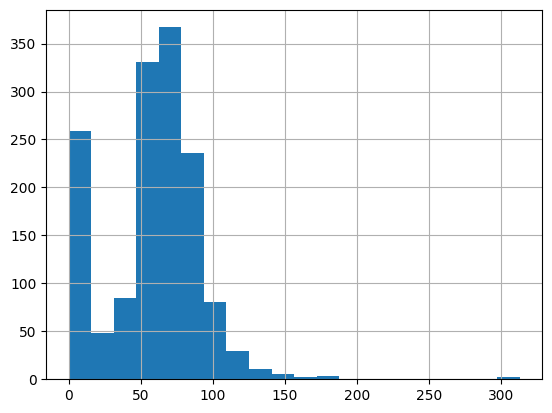

In [113]:
plt.Figure(figsize=(5,3))
df["LotFrontage"].hist(bins=20);

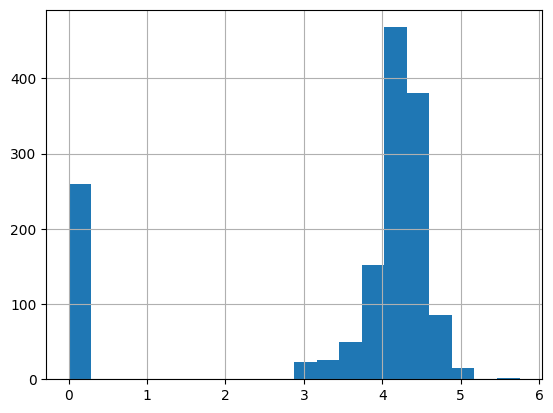

In [116]:
plt.Figure(figsize=(5,3))
df["LotFrontage"].apply(np.log1p).hist(bins=20);

In [119]:
df["LotFrontage"] = df["LotFrontage"].apply(np.log1p)

## LotArea

In [108]:
df["LotArea"].isna().sum()

np.int64(0)

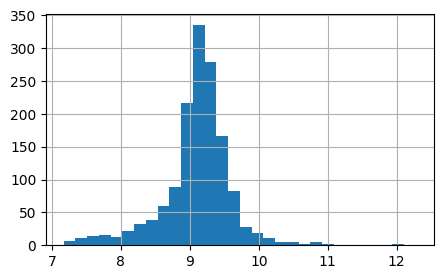

In [109]:
plt.figure(figsize=(5,3))
df["LotArea"].apply(np.log).hist(bins=30);

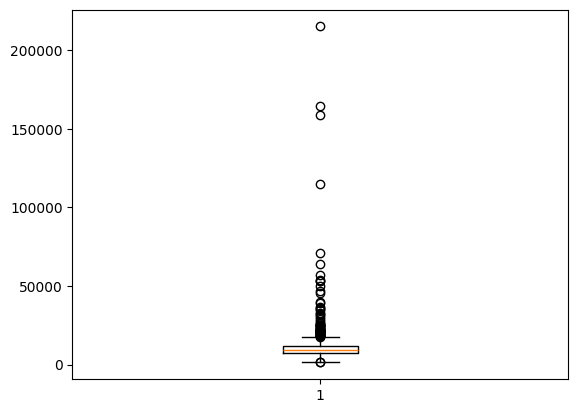

In [110]:
plt.boxplot(df["LotArea"]);

In [111]:
detectar_outliers_iqr(df, "LotArea")

{'Q1': np.float64(7553.5),
 'Q3': np.float64(11601.5),
 'IQR': np.float64(4048.0),
 'limite_inferior': np.float64(1481.5),
 'limite_superior': np.float64(17673.5),
 'n_outliers': 69,
 'outliers':                                      MSSubClass  MSZoning  LotFrontage  \
 Id                                                                       
 54              1-STORY 1946 & NEWER ALL STYLES         4         68.0   
 67              1-STORY 1946 & NEWER ALL STYLES         4          0.0   
 114             1-STORY 1946 & NEWER ALL STYLES         4          0.0   
 121                        SPLIT OR MULTI-LEVEL         4          0.0   
 160                        2-STORY 1946 & NEWER         4        134.0   
 172             1-STORY 1946 & NEWER ALL STYLES         4        141.0   
 186                        2-1/2 STORY ALL AGES         3         90.0   
 198                        2-1/2 STORY ALL AGES         4        174.0   
 250               1-1/2 STORY FINISHED ALL AGES       

In [117]:
df["LotArea"] = df["LotArea"].apply(np.log10)
detectar_outliers_iqr(df, "LotArea")

{'Q1': np.float64(3.8781480021531904),
 'Q3': np.float64(4.064514133477316),
 'IQR': np.float64(0.18636613132412583),
 'limite_inferior': np.float64(3.5985988051670015),
 'limite_superior': np.float64(4.344063330463505),
 'n_outliers': 132,
 'outliers':                                              MSSubClass  MSZoning  \
 Id                                                                  
 54                      1-STORY 1946 & NEWER ALL STYLES         4   
 57                           2-STORY PUD - 1946 & NEWER         5   
 76              PUD - MULTILEVEL - INCL SPLIT LEV/FOYER         3   
 88                           2-STORY PUD - 1946 & NEWER         5   
 116                          2-STORY PUD - 1946 & NEWER         5   
 146                          2-STORY PUD - 1946 & NEWER         3   
 172                     1-STORY 1946 & NEWER ALL STYLES         4   
 181                          2-STORY PUD - 1946 & NEWER         5   
 186                                2-1/2 STORY

In [118]:
(df["LotArea"] > 5).sum()

np.int64(4)

## Variable objeto (SalePrice)

In [120]:
df["SalePrice"].isna().sum()

np.int64(0)

In [121]:
df["SalePrice"].dtype

dtype('int64')

<Axes: >

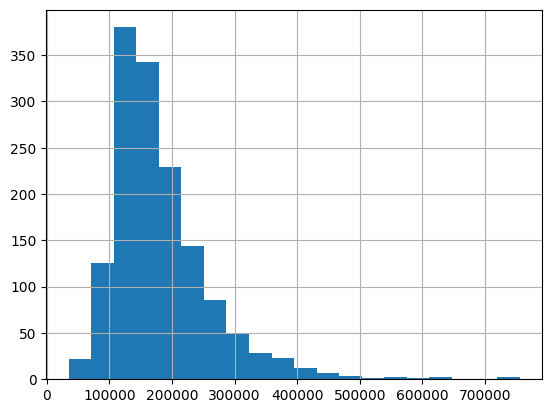

In [122]:
plt.Figure(figsize=(7,3))
df["SalePrice"].hist(bins=20)

<Axes: >

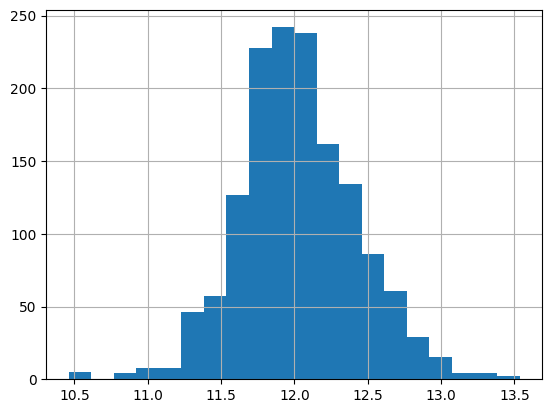

In [123]:
plt.Figure(figsize=(7,3))
df["SalePrice"].apply(np.log).hist(bins=20)

In [124]:
df["SalePrice"] = df["SalePrice"].apply(np.log)

## Creo modelo basico

In [125]:
cols = ["MSSubClass", "MSZoning", "LotFrontage", "LotArea", "SalePrice"]
df = df[cols]

In [126]:
df.head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,SalePrice
Id,,,,,
1,2-STORY 1946 & NEWER,4,4.189655,3.926857,12.247694
2,1-STORY 1946 & NEWER ALL STYLES,4,4.394449,3.982271,12.109011
3,2-STORY 1946 & NEWER,4,4.234107,4.051153,12.317167


In [127]:
df = 1*pd.get_dummies(df, drop_first=True)
df.head(3)

,MSZoning,LotFrontage,LotArea,SalePrice,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,MSSubClass_DUPLEX - ALL STYLES AND AGES,MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,MSSubClass_SPLIT FOYER,MSSubClass_SPLIT OR MULTI-LEVEL
Id,,,,,,,,,,,,,,,,,,
1,4,4.189655,3.926857,12.247694,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,4,4.394449,3.982271,12.109011,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,4,4.234107,4.051153,12.317167,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [128]:
df.shape

(1460, 18)

In [129]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.3, random_state=1)
df_train.head(3)

,MSZoning,LotFrontage,LotArea,SalePrice,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,MSSubClass_DUPLEX - ALL STYLES AND AGES,MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,MSSubClass_SPLIT FOYER,MSSubClass_SPLIT OR MULTI-LEVEL
Id,,,,,,,,,,,,,,,,,,
633,4,4.454347,4.075547,11.320554,0,0,1,0,0,0,0,0,0,0,0,0,0,0
209,4,0.000000,4.157275,12.531773,0,0,0,0,0,0,0,0,1,0,0,0,0,0
84,4,4.394449,3.948999,11.747998,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [130]:
df_train.head()

,MSZoning,LotFrontage,LotArea,SalePrice,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,MSSubClass_DUPLEX - ALL STYLES AND AGES,MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,MSSubClass_SPLIT FOYER,MSSubClass_SPLIT OR MULTI-LEVEL
Id,,,,,,,,,,,,,,,,,,
633,4,4.454347,4.075547,11.320554,0,0,1,0,0,0,0,0,0,0,0,0,0,0
209,4,0.000000,4.157275,12.531773,0,0,0,0,0,0,0,0,1,0,0,0,0,0
84,4,4.394449,3.948999,11.747998,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1175,4,4.394449,4.219060,12.384219,0,0,0,0,0,0,0,1,0,0,0,0,0,0
251,4,4.025352,3.728354,11.245046,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [131]:
# Apuntes
X_train = df_train.drop("SalePrice", axis=1)
y_train = df_train["SalePrice"]

# Examen
X_test = df_test.drop("SalePrice", axis=1)
y_test = df_test["SalePrice"]


In [132]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train) # Entrenamiendo del modelo

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [133]:
model.score(X_train, y_train), model.score(X_test, y_test)

(0.45725607096553145, 0.48633886796405235)

In [134]:
predicciones = np.exp(model.predict(X_test)).round()
predicciones[:10]

array([239223., 176611., 154519.,  97714., 165963., 226926., 237264.,
       160465., 235081., 164455.])

In [135]:
reales = np.exp(y_test)
reales[:10]

Id
259     231500.0
268     179500.0
289     122000.0
650      84500.0
1234    142000.0
168     325624.0
927     285000.0
832     151000.0
1238    195000.0
427     275000.0
Name: SalePrice, dtype: float64

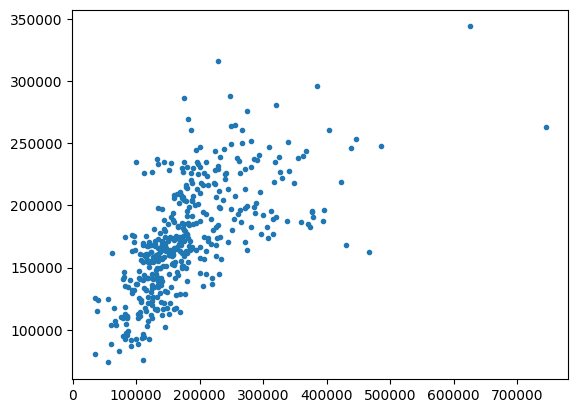

In [136]:
plt.plot(reales, predicciones, ".")